#### Importing necessary libraries and dataset

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import make_scorer

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns

import time

# Use Matplotlib inline mode
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Record the start time
start_time = time.time()

In [3]:
# Load the dataset
dataset_file = "bank_customer_attrition.csv"
df = pd.read_csv(dataset_file, encoding="utf-8")

* **Removing columns which hold the y information**

In [4]:
df.drop(
    [
        "CLIENTNUM",
        "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
        "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    ],
    axis=1,
    inplace=True,
)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Columns and description

- CLIENTNUM	- Unique identifier for each customer. (Integer)
- Attrition_Flag	- Flag indicating whether or not the customer has churned out. (Boolean)
- Customer_Age	- Age of customer. (Integer)
- Gender	- Gender of customer. (String)
- Dependent_count	- Number of dependents that customer has. (Integer)
- Education_Level	- Education level of customer. (String)
- Marital_Status	- Marital status of customer. (String)
- Income_Category	- Income category of customer. (String)
- Card_Category	- Type of card held by customer. (String)
- Months_on_book	- How long customer has been on the books. (Integer)
- Total_Relationship_Count	- Total number of relationships customer has with the credit card provider. (Integer)
- Months_Inactive_12_mon	- Number of months customer has been inactive in the last twelve months. (Integer)
- Contacts_Count_12_mon	- Number of contacts customer has had in the last twelve months. (Integer)
- Credit_Limit	- Credit limit of customer. (Integer)
- Total_Revolving_Bal	- Total revolving balance of customer. (Integer)
- Avg_Open_To_Buy	- Average open to buy ratio of customer. (Integer)
- Total_Amt_Chng_Q4_Q1	- Total amount changed from quarter 4 to quarter 1. (Integer)
- Total_Trans_Amt	- Total transaction amount. (Integer)
- Total_Trans_Ct	- Total transaction count. (Integer)
- Total_Ct_Chng_Q4_Q1	- Total count changed from quarter 4 to quarter 1. (Integer)
- Avg_Utilization_Ratio	- Average utilization ratio of customer. (Integer)

#### Data Cleaning

In [5]:
new_column_names = {
    "Attrition_Flag": "attrition_flag",
    "Customer_Age": "customer_age",
    "Gender": "gender",
    "Dependent_count": "dependent_count",
    "Education_Level": "education_level",
    "Marital_Status": "marital_status",
    "Income_Category": "income_category",
    "Card_Category": "card_category",
    "Months_on_book": "months_on_book",
    "Total_Relationship_Count": "total_relationship_count",
    "Months_Inactive_12_mon": "months_inactive_12",
    "Contacts_Count_12_mon": "contacts_count_12",
    "Credit_Limit": "credit_limit",
    "Total_Revolving_Bal": "revolving_balance",
    "Avg_Open_To_Buy": "avg_open_to_buy",
    "Total_Amt_Chng_Q4_Q1": "total_amt_chng_q4_q1",
    "Total_Trans_Amt": "total_trans_amt",
    "Total_Trans_Ct": "total_trans_ct",
    "Total_Ct_Chng_Q4_Q1": "total_ct_chng_q4_q1",
    "Avg_Utilization_Ratio": "avg_utilization_ratio",
}

df.rename(columns=new_column_names, inplace=True)

In [6]:
df.dtypes

attrition_flag               object
customer_age                  int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
income_category              object
card_category                object
months_on_book                int64
total_relationship_count      int64
months_inactive_12            int64
contacts_count_12             int64
credit_limit                float64
revolving_balance             int64
avg_open_to_buy             float64
total_amt_chng_q4_q1        float64
total_trans_amt               int64
total_trans_ct                int64
total_ct_chng_q4_q1         float64
avg_utilization_ratio       float64
dtype: object

In [7]:
df.isnull().sum()

attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12          0
contacts_count_12           0
credit_limit                0
revolving_balance           0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [8]:
print("Dataframe lenght before duplicate removal:", len(df))
df.drop_duplicates(inplace=True)
print("Dataframe lenght after duplicate removal:", len(df))

Dataframe lenght before duplicate removal: 10127
Dataframe lenght after duplicate removal: 10127


In [9]:
df.isin(["Unknown"]).sum()

attrition_flag                 0
customer_age                   0
gender                         0
dependent_count                0
education_level             1519
marital_status               749
income_category             1112
card_category                  0
months_on_book                 0
total_relationship_count       0
months_inactive_12             0
contacts_count_12              0
credit_limit                   0
revolving_balance              0
avg_open_to_buy                0
total_amt_chng_q4_q1           0
total_trans_amt                0
total_trans_ct                 0
total_ct_chng_q4_q1            0
avg_utilization_ratio          0
dtype: int64

In [10]:
def remove_unknown(df, columns):
    """
    Remove rows where at least one of the specified columns contains the value "Unknown".

    Parameters:
    df (pandas.DataFrame): Input dataframe.
    columns (list of str): List of column names to check.

    Returns:
    pandas.DataFrame: The input dataframe with rows removed where at least one of the specified columns contains "Unknown".
    """
    mask = df[columns].apply(lambda x: x.str.contains("Unknown")).any(axis=1)
    df_cleaned = df[~mask]
    return df_cleaned

In [11]:
df_cleaned = pd.DataFrame()
columns = ["education_level", "marital_status", "income_category"]
df_cleaned = remove_unknown(df, columns)

In [12]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,7081.0,46.347691,8.041225,26.0,41.000,46.000,52.000,73.000
dependent_count,7081.0,2.337805,1.291649,0.0,1.000,2.000,3.000,5.000
months_on_book,7081.0,35.981359,8.002609,13.0,31.000,36.000,40.000,56.000
total_relationship_count,7081.0,3.819376,1.544444,1.0,3.000,4.000,5.000,6.000
months_inactive_12,7081.0,2.342607,0.995104,0.0,2.000,2.000,3.000,6.000
contacts_count_12,7081.0,2.454456,1.104917,0.0,2.000,2.000,3.000,6.000
credit_limit,7081.0,8492.773831,9126.072520,1438.3,2498.000,4287.000,10729.000,34516.000
revolving_balance,7081.0,1167.501624,812.315606,0.0,463.000,1282.000,1781.000,2517.000
avg_open_to_buy,7081.0,7325.272207,9131.217585,3.0,1248.000,3250.000,9491.000,34516.000
total_amt_chng_q4_q1,7081.0,0.760584,0.223139,0.0,0.629,0.735,0.858,3.397


In [13]:
df_cleaned.describe(include="O").T

,count,unique,top,freq
attrition_flag,7081,2,Existing Customer,5968
gender,7081,2,M,3706
education_level,7081,6,Graduate,2591
marital_status,7081,3,Married,3564
income_category,7081,5,Less than $40K,2792
card_category,7081,4,Blue,6598


In [14]:
df_cleaned_uniques = pd.DataFrame(
    [[i, len(df_cleaned[i].unique())] for i in df_cleaned.columns],
    columns=["Variable", "Unique Values"],
).set_index("Variable")
df_cleaned_uniques

,Unique Values
Variable,
attrition_flag,2
customer_age,45
gender,2
dependent_count,6
education_level,6
marital_status,3
income_category,5
card_category,4
months_on_book,44


### Feature Engineering

In [15]:
binary_variables = ["attrition_flag"]
binary_variables

['attrition_flag']

In [16]:
categorical_variables = list(
    ("gender", "education_level", "marital_status", "income_category", "card_category")
)
categorical_variables

['gender',
 'education_level',
 'marital_status',
 'income_category',
 'card_category']

In [17]:
ordinal_variables = list(
    (
        "dependent_count",
        "months_inactive_12",
        "contacts_count_12",
        "total_relationship_count",
    )
)
ordinal_variables

['dependent_count',
 'months_inactive_12',
 'contacts_count_12',
 'total_relationship_count']

In [18]:
# Print the unique values for the categorical_variables
[[i, list(df_cleaned[i].unique())] for i in categorical_variables]

[['gender', ['M', 'F']],
 ['education_level',
  ['High School',
   'Graduate',
   'Uneducated',
   'College',
   'Post-Graduate',
   'Doctorate']],
 ['marital_status', ['Married', 'Single', 'Divorced']],
 ['income_category',
  ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +']],
 ['card_category', ['Blue', 'Gold', 'Silver', 'Platinum']]]

In [19]:
# Print the unique values for the two new columns
print('Unique values for "customer_age":\n', df_cleaned["customer_age"].unique())
print('\nUnique values for "months_on_book":\n', df_cleaned["months_on_book"].unique())

Unique values for "customer_age":
 [45 49 51 40 44 37 48 56 57 61 47 62 41 53 58 55 42 50 59 46 52 54 66 39
 43 64 67 60 68 63 73 70 35 34 38 36 65 33 26 31 29 30 32 28 27]

Unique values for "months_on_book":
 [39 44 36 21 48 56 42 49 33 28 38 41 43 37 30 45 52 40 54 50 34 35 32 20
 29 47 31 46 27 53 24 55 23 22 26 25 13 51 15 17 19 18 16 14]



* To better represent the data and simplify it we change the 'months_on_book' and 'customer_age' to categorical.

In [20]:
# Categorize the 'customer_age' and 'months_on_book' columns
df_cleaned["months_on_book_bins"] = pd.cut(df_cleaned["months_on_book"], bins=8)
df_cleaned["customer_age_bins"] = pd.cut(df_cleaned["customer_age"], bins=8)

# Print the unique values for the two new columns
print('Unique values for "customer_age_bins":\n', df_cleaned["customer_age_bins"].unique())
print('\nUnique values for "months_on_book_bins":\n', df_cleaned["months_on_book_bins"].unique())

Unique values for "customer_age_bins":
 [(43.625, 49.5], (49.5, 55.375], (37.75, 43.625], (31.875, 37.75], (55.375, 61.25], (61.25, 67.125], (67.125, 73.0], (25.953, 31.875]]
Categories (8, interval[float64, right]): [(25.953, 31.875] < (31.875, 37.75] < (37.75, 43.625] < (43.625, 49.5] < (49.5, 55.375] < (55.375, 61.25] < (61.25, 67.125] < (67.125, 73.0]]

Unique values for "months_on_book_bins":
 [(34.5, 39.875], (39.875, 45.25], (18.375, 23.75], (45.25, 50.625], (50.625, 56.0], (29.125, 34.5], (23.75, 29.125], (12.957, 18.375]]
Categories (8, interval[float64, right]): [(12.957, 18.375] < (18.375, 23.75] < (23.75, 29.125] < (29.125, 34.5] < (34.5, 39.875] < (39.875, 45.25] < (45.25, 50.625] < (50.625, 56.0]]


In [21]:
df_cleaned_uniques = pd.DataFrame(
    [[i, len(df_cleaned[i].unique())] for i in df_cleaned.columns],
    columns=["Variable", "Unique Values"],
).set_index("Variable")
df_cleaned_uniques

,Unique Values
Variable,
attrition_flag,2
customer_age,45
gender,2
dependent_count,6
education_level,6
marital_status,3
income_category,5
card_category,4
months_on_book,44


In [22]:
categorical_variables = sorted(
    list(set(categorical_variables + ["months_on_book_bins", "customer_age_bins"]))
)
categorical_variables

['card_category',
 'customer_age_bins',
 'education_level',
 'gender',
 'income_category',
 'marital_status',
 'months_on_book_bins']

In [23]:
numeric_variables = list(
    set(df_cleaned.columns)
    - set(categorical_variables)
    - set(ordinal_variables)
    - set(binary_variables)
)
remove = ["customer_age", "months_on_book"]
numeric_variables = sorted([col for col in numeric_variables if col not in remove])
numeric_variables

['avg_open_to_buy',
 'avg_utilization_ratio',
 'credit_limit',
 'revolving_balance',
 'total_amt_chng_q4_q1',
 'total_ct_chng_q4_q1',
 'total_trans_amt',
 'total_trans_ct']

In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition_flag            7081 non-null   object  
 1   customer_age              7081 non-null   int64   
 2   gender                    7081 non-null   object  
 3   dependent_count           7081 non-null   int64   
 4   education_level           7081 non-null   object  
 5   marital_status            7081 non-null   object  
 6   income_category           7081 non-null   object  
 7   card_category             7081 non-null   object  
 8   months_on_book            7081 non-null   int64   
 9   total_relationship_count  7081 non-null   int64   
 10  months_inactive_12        7081 non-null   int64   
 11  contacts_count_12         7081 non-null   int64   
 12  credit_limit              7081 non-null   float64 
 13  revolving_balance         7081 non-null   int64

### Exploratory Data Analysis

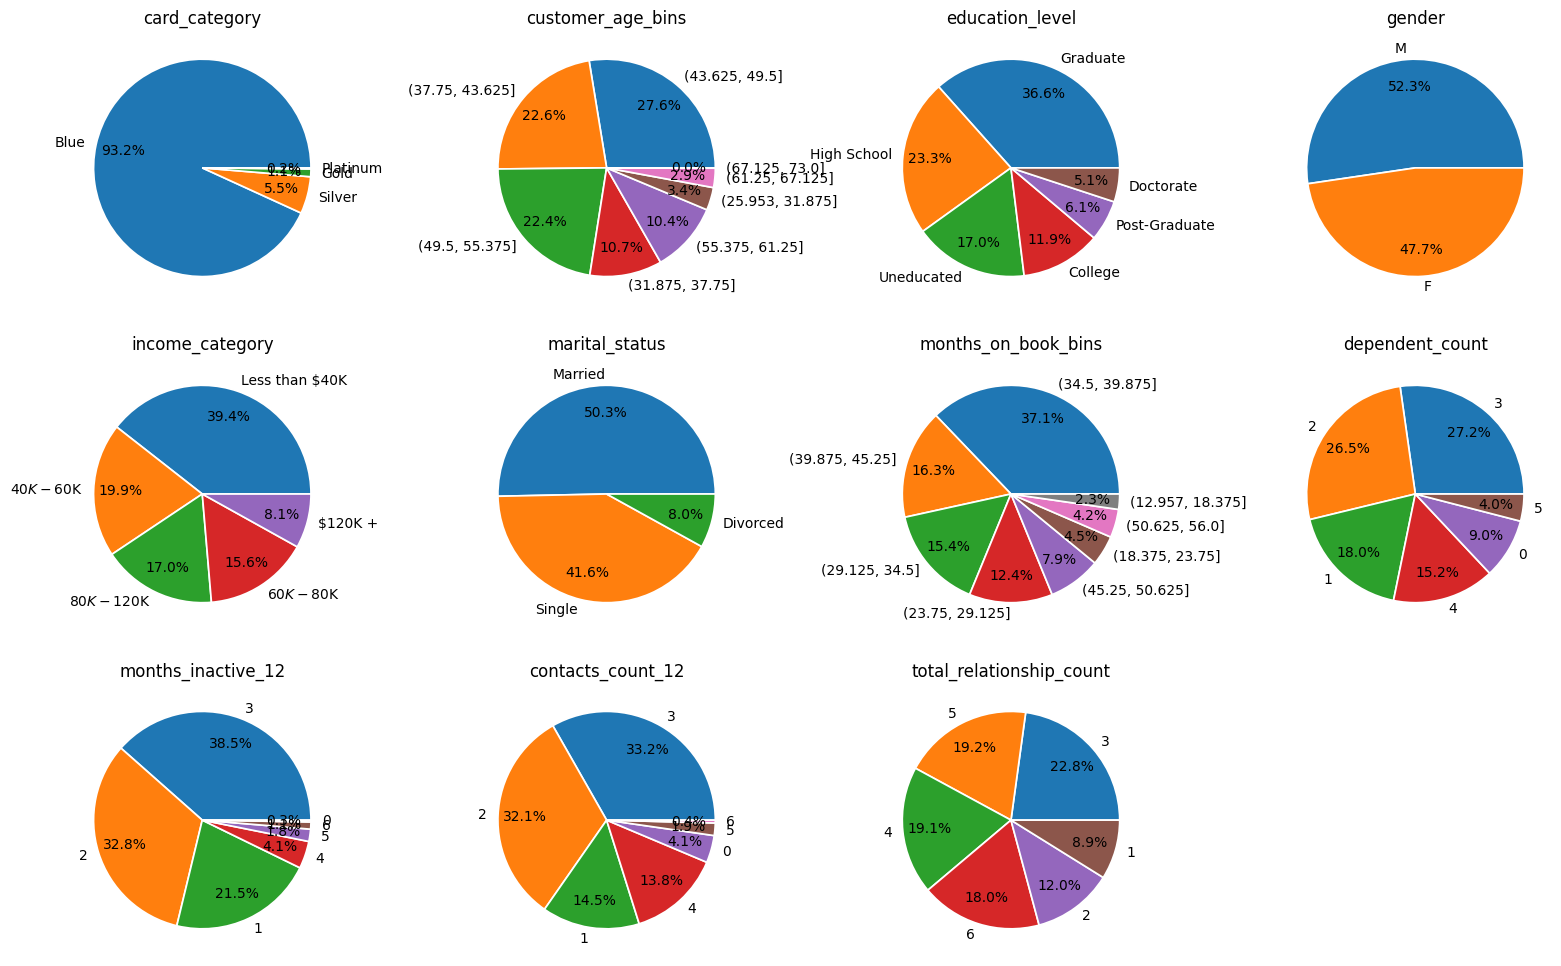

In [25]:
def plot_pie_charts(data, categorical_variables):
    """
    Display pie charts for each categorical variable in the dataset.

    Parameters:
    data (pandas.DataFrame): The input dataset.
    categorical_variables (list): A list of categorical variable column names.

    Returns:
    None
    """
    n_cols = 4  # Maximum number of columns
    n_rows = (
        len(categorical_variables) + n_cols - 1
    ) // n_cols  # Calculate number of rows

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4))

    for i, var in enumerate(categorical_variables):
        row, col = i // n_cols, i % n_cols
        counts = data[var].value_counts(normalize=True)

        ax = axes[row, col] if n_rows > 1 else axes[col]  # Get subplot axis
        ax.pie(
            counts,
            labels=counts.index,
            autopct="%1.1f%%",
            pctdistance=0.75,
            wedgeprops={"linewidth": 1.25, "edgecolor": "white"},
        )
        ax.set_title(var, fontsize=12)

    # Remove empty subplots
    for i in range(len(categorical_variables), n_rows * n_cols):
        row, col = i // n_cols, i % n_cols
        ax = axes[row, col] if n_rows > 1 else axes[col]
        ax.remove()

    plt.show()
    
plot_pie_charts(df_cleaned, categorical_variables + ordinal_variables)

##### Distribution of categorical variables

- card_category: the chart shows that 93% of customers have a Blue card.
- gender: dataset looks to be split almost evenly with 52% males and 48% females.
- income_category: most customers have an income of less than $40K.
- customer_age_bins: 27% of the customers are between the ages of 43 and 49, only 3% are above 61.

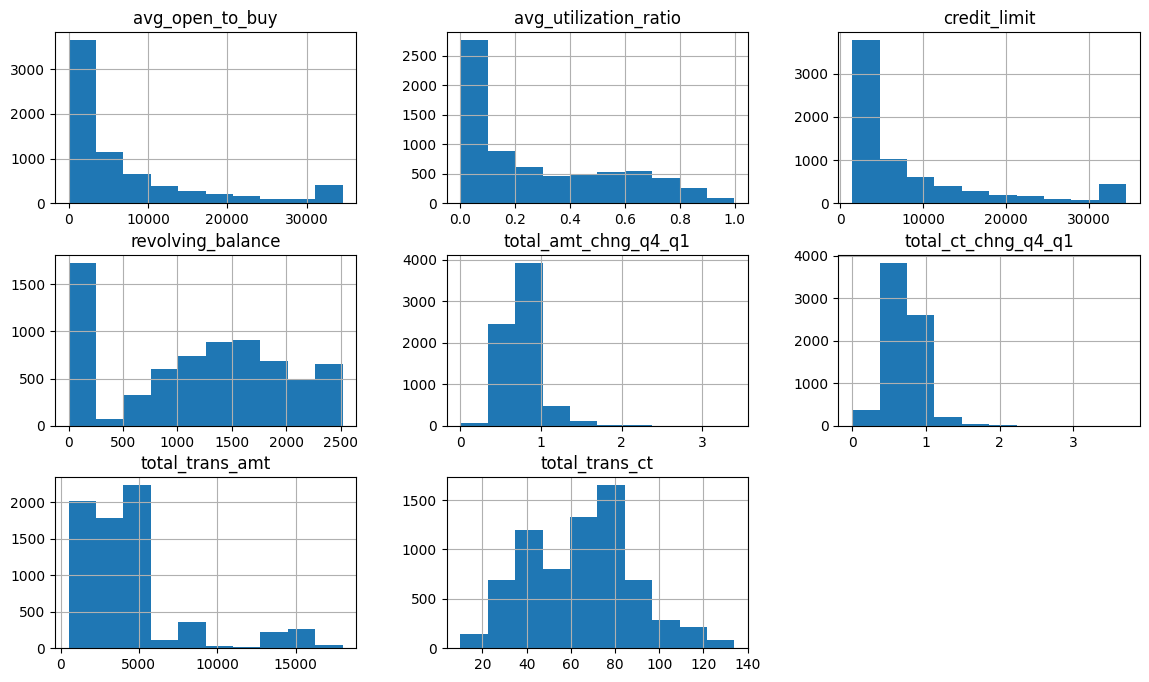

In [26]:
# Plot histograms of numeric variables
fig, ax = plt.subplots(figsize=(14, 8), squeeze=True)
df_cleaned[numeric_variables].hist(ax=ax)
plt.show()

In [27]:
churn_df = df_cleaned.copy()
churn_df = churn_df[
    binary_variables + categorical_variables + numeric_variables + ordinal_variables
]
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition_flag            7081 non-null   object  
 1   card_category             7081 non-null   object  
 2   customer_age_bins         7081 non-null   category
 3   education_level           7081 non-null   object  
 4   gender                    7081 non-null   object  
 5   income_category           7081 non-null   object  
 6   marital_status            7081 non-null   object  
 7   months_on_book_bins       7081 non-null   category
 8   avg_open_to_buy           7081 non-null   float64 
 9   avg_utilization_ratio     7081 non-null   float64 
 10  credit_limit              7081 non-null   float64 
 11  revolving_balance         7081 non-null   int64   
 12  total_amt_chng_q4_q1      7081 non-null   float64 
 13  total_ct_chng_q4_q1       7081 non-null   float

#### Variable encoding (more feature engineering)

In [28]:
le = LabelEncoder()

for column in ordinal_variables + categorical_variables:
    print(column)
    churn_df[column] = le.fit_transform(churn_df[column])

dependent_count
months_inactive_12
contacts_count_12
total_relationship_count
card_category
customer_age_bins
education_level
gender
income_category
marital_status
months_on_book_bins


In [29]:
for column in binary_variables:
    print(column)
    churn_df[column] = np.where(churn_df[column] == "Existing Customer", 0, 1)

attrition_flag


In [30]:
mm = MinMaxScaler()

for column in [numeric_variables + ordinal_variables + categorical_variables]:
    print(column)
    churn_df[column] = mm.fit_transform(churn_df[column])

['avg_open_to_buy', 'avg_utilization_ratio', 'credit_limit', 'revolving_balance', 'total_amt_chng_q4_q1', 'total_ct_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'dependent_count', 'months_inactive_12', 'contacts_count_12', 'total_relationship_count', 'card_category', 'customer_age_bins', 'education_level', 'gender', 'income_category', 'marital_status', 'months_on_book_bins']


In [31]:
round(churn_df.describe().T, 4)

,count,mean,std,min,25%,50%,75%,max
attrition_flag,7081.0,0.1572,0.3640,0.0,0.0000,0.0000,0.0000,1.0
card_category,7081.0,0.0601,0.2315,0.0,0.0000,0.0000,0.0000,1.0
customer_age_bins,7081.0,0.4254,0.1952,0.0,0.2857,0.4286,0.5714,1.0
education_level,7081.0,0.5153,0.2968,0.0,0.4000,0.4000,0.6000,1.0
gender,7081.0,0.5234,0.4995,0.0,0.0000,1.0000,1.0000,1.0
income_category,7081.0,0.6493,0.3458,0.0,0.2500,0.7500,1.0000,1.0
marital_status,7081.0,0.6680,0.3098,0.0,0.5000,0.5000,1.0000,1.0
months_on_book_bins,7081.0,0.5457,0.2138,0.0,0.4286,0.5714,0.7143,1.0
avg_open_to_buy,7081.0,0.2122,0.2646,0.0,0.0361,0.0941,0.2749,1.0
avg_utilization_ratio,7081.0,0.2826,0.2790,0.0,0.0260,0.1862,0.5155,1.0


In [32]:
churn_df.head()

,attrition_flag,card_category,customer_age_bins,education_level,gender,income_category,marital_status,months_on_book_bins,avg_open_to_buy,avg_utilization_ratio,credit_limit,revolving_balance,total_amt_chng_q4_q1,total_ct_chng_q4_q1,total_trans_amt,total_trans_ct,dependent_count,months_inactive_12,contacts_count_12,total_relationship_count
0,0,0.0,0.428571,0.6,1.0,0.50,0.5,0.571429,0.345116,0.061061,0.340190,0.308701,0.392994,0.437534,0.036260,0.258065,0.6,0.166667,0.500000,0.8
1,0,0.0,0.428571,0.4,0.0,1.00,1.0,0.714286,0.214093,0.105105,0.206112,0.343266,0.453636,1.000000,0.044667,0.185484,1.0,0.166667,0.333333,1.0
2,0,0.0,0.571429,0.4,1.0,0.75,0.5,0.571429,0.098948,0.000000,0.059850,0.000000,0.763615,0.628164,0.078753,0.080645,0.6,0.166667,0.000000,0.6
4,0,0.0,0.285714,1.0,1.0,0.50,0.5,0.142857,0.136557,0.000000,0.099091,0.000000,0.640271,0.673129,0.017501,0.145161,0.6,0.166667,0.000000,0.8
5,0,0.0,0.428571,0.4,1.0,0.25,0.5,0.571429,0.079970,0.311311,0.077747,0.495431,0.405063,0.227787,0.033057,0.112903,0.4,0.166667,0.333333,0.4


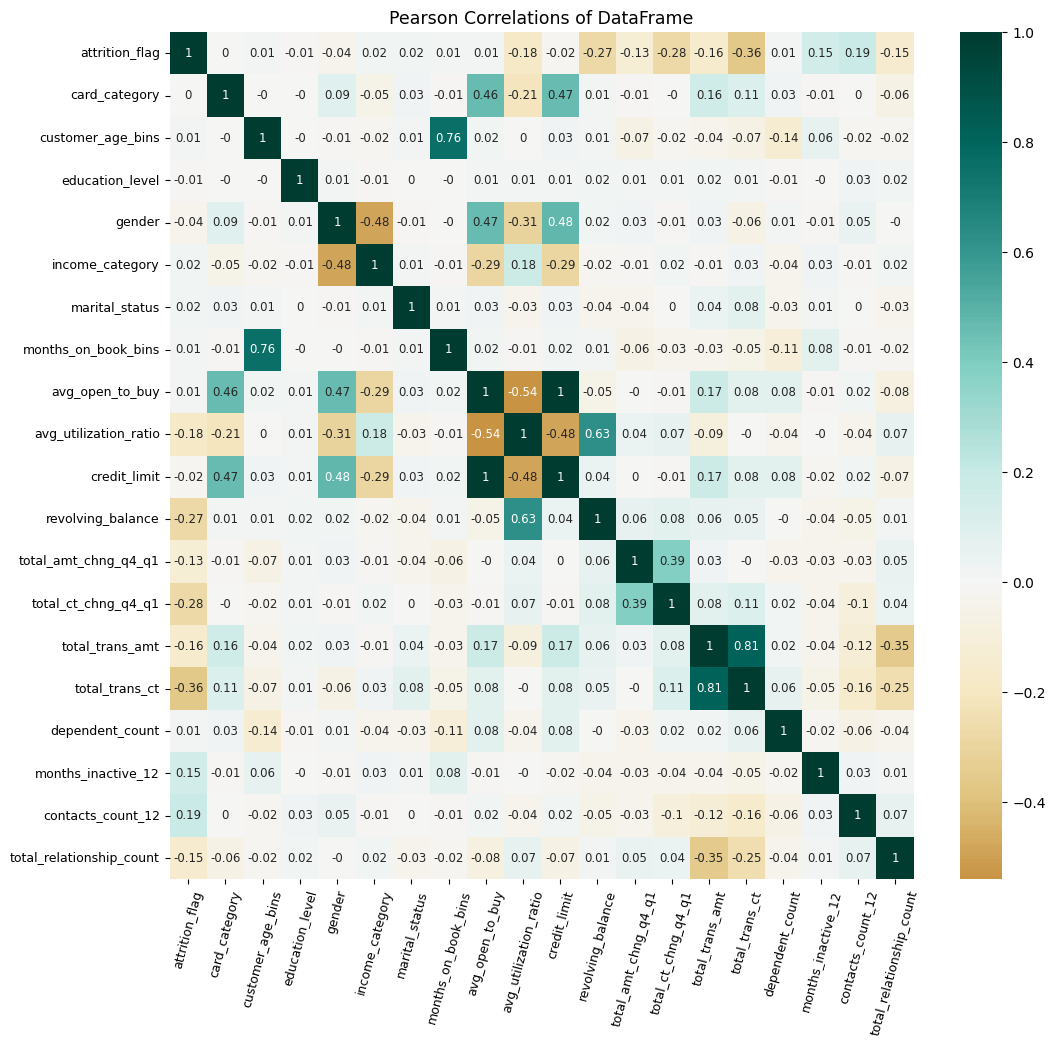

In [33]:
def plot_correlations(dataframe):
    """
    Plots the Pearson correlations between columns in the provided dataframe.

    :param dataframe: The pandas dataframe to analyze.
    """

    correlations = dataframe.corr().round(2)

    fig, ax = plt.subplots(figsize=(12, 11))
    sns.heatmap(correlations, annot=True, center=0, cmap="BrBG", annot_kws={"fontsize":8.5})
    ax.set_title('Pearson Correlations of DataFrame', fontsize=12.5)
    ax.tick_params(axis='x', labelsize=9, rotation=75)
    ax.tick_params(axis='y', labelsize=9)
    plt.show()
    
plot_correlations(churn_df)

- There is a strong positive correlation between 'total_trans_amt' and 'total_trans_ct', with a correlation coefficient of 0.81. This suggests that customers who make more transactions also tend to spend more, as the total transaction amount and total transaction move together.

- Most of the demographic variables seem to have a very low correlation with the target variable, with correlation coefficients ranging from -0.04 to 0.02. This suggests that the demographic variables may not be strong predictors of customer churn. However, it is worth noting that some demographic variables may still have an impact on customer churn that is not captured by the correlation analysis."

- The highest correlations with the target variable are with 'total_trans_ct', 'total_ct_chng_q4_q1', and 'revolving_balance', with correlation coefficients of -0.36, -0.28, and -0.27, respectively. These negative correlations suggest that customers who have more transactions, a higher change in their transaction count from the fourth quarter to the first quarter, and a higher revolving balance are less likely to churn.

<AxesSubplot: >

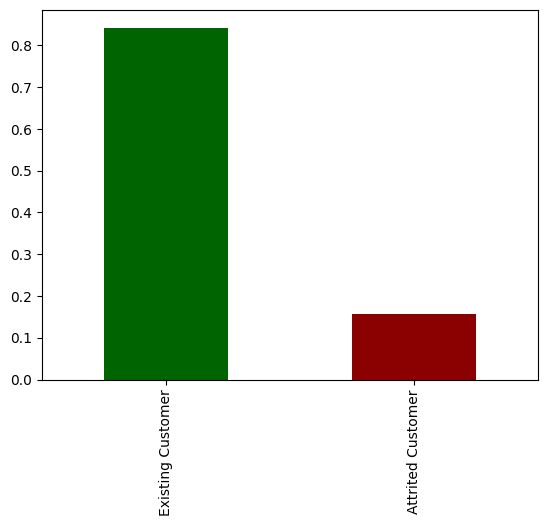

In [34]:
# Visualize the count for each class
target_counts = df_cleaned["attrition_flag"].value_counts(normalize=True)
target_counts.plot.bar(color=["darkgreen", "darkred"])

- As you can see we are dealing with an imbalanced dataset, but we will train and test three classification models and check the results.
- Get the best parameters for these three models and then move on to try to fix this issue and see if we can get better predictions.

posx and posy should be finite values
posx and posy should be finite values


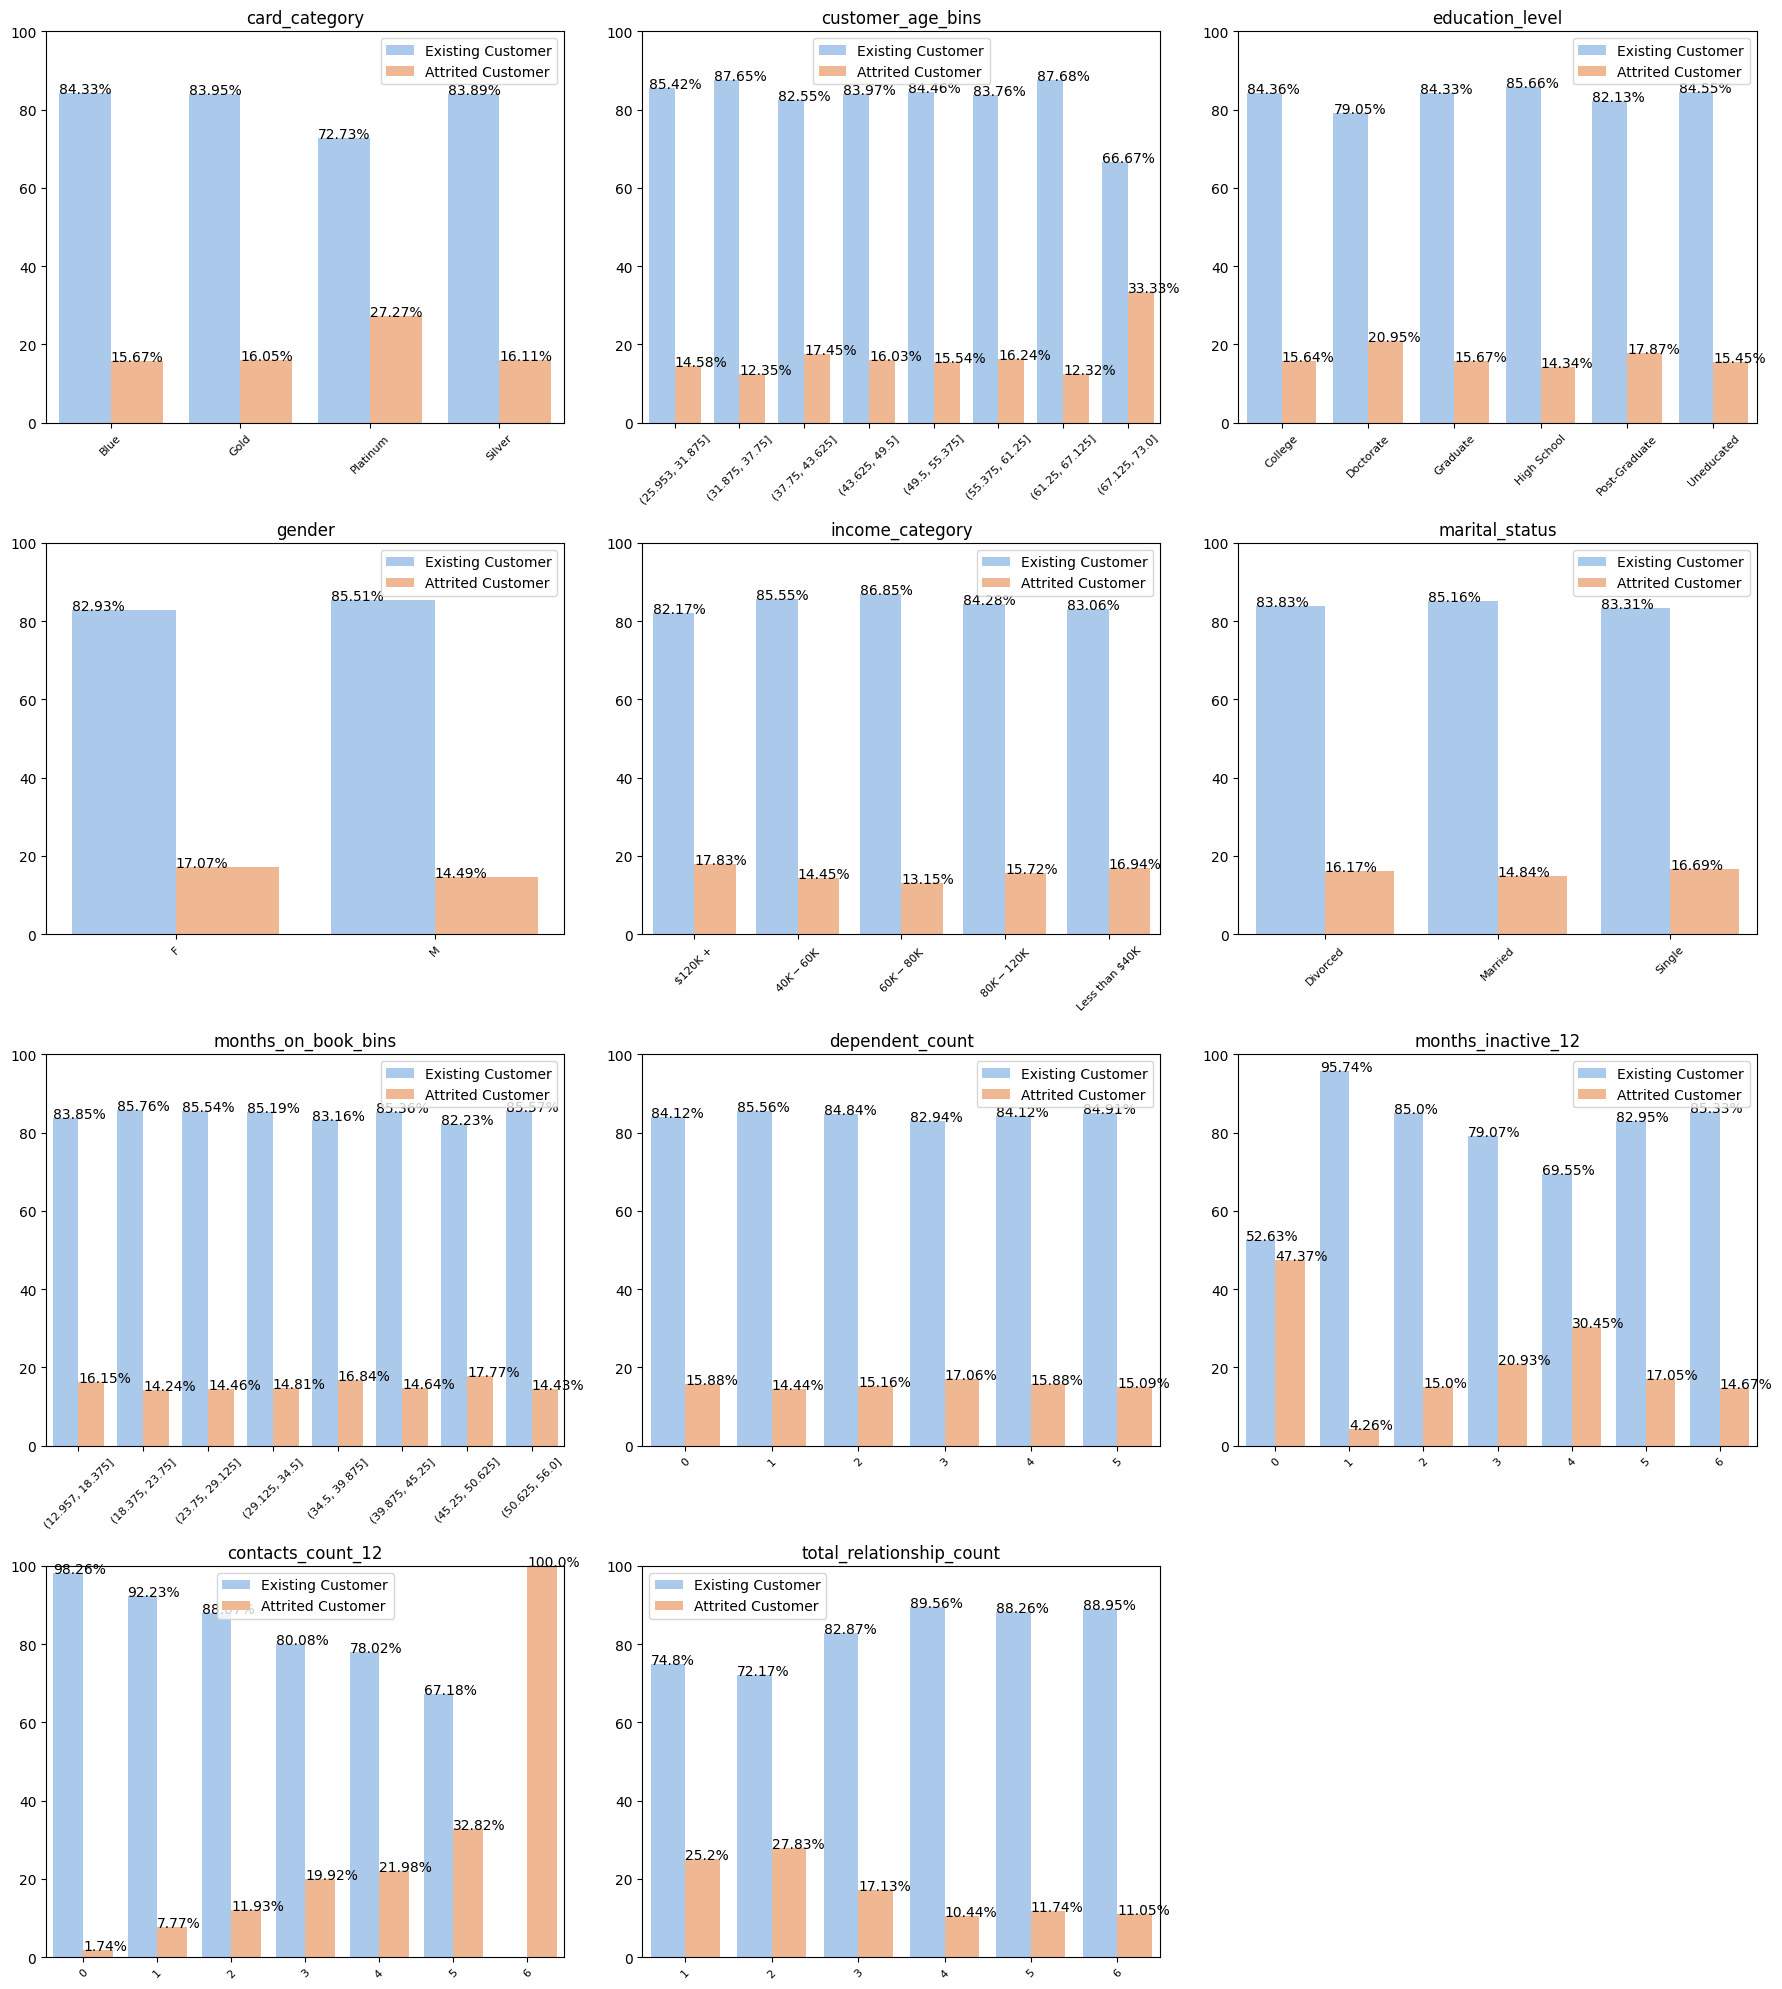

In [35]:
def create_barplot_grid(dataframe, categorical_variables, y):
    """
    Create a grid of categorical plots for categorical and ordinal columns with respect to y column.

    Parameters:
    dataframe (pandas.DataFrame): Input dataframe.
    categorical_variables (list): List of categorical and ordinal column names to plot.
    y (str): Categorical column to plot on the y-axis.

    Returns:
    None
    """
    n_cols = 3  # number of columns in the grid
    n_rows = -(-len(categorical_variables) // n_cols)  # round up division
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 20))

    for col, ax in zip(categorical_variables, axes.flatten()):
        if len(dataframe[col].unique()) >= 2:
            df1 = dataframe.groupby(col)[y].value_counts(normalize=True)
            df1 = df1.mul(100)
            df1 = df1.rename("percent").reset_index()

            g = sns.barplot(
                x=col, y="percent", hue=y, data=df1, palette="pastel", ax=ax
            )
            g.set_ylim(0, 100)

            for p in g.patches:
                txt = str(p.get_height().round(2)) + "%"
                txt_x = p.get_x()
                txt_y = p.get_height()
                g.text(txt_x, txt_y, txt)
                g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=8)
                g.legend(fontsize=10)

        ax.set_title(col)
        ax.set_xlabel("")
        ax.set_ylabel("")

    # remove any unused axes
    for i in range(len(categorical_variables), n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()


create_barplot_grid(df_cleaned, categorical_variables + ordinal_variables, "attrition_flag")

- We can see here that for some variables, the attrited customers have a pretty balanced % across categories, specially for the demographic ones.
- However, for contacts_count_12 for example, the more contacts the customer has had with the bank in the last 12 months the more likey it is to churn. Possible reasons for this trend would be dissatisfaction with the bank's services or too much promotional communication.
- Regarding 'card_category' the ones that have a Platinum card are more likely to churn. More demanding expectations could explain the higher attrition rate.

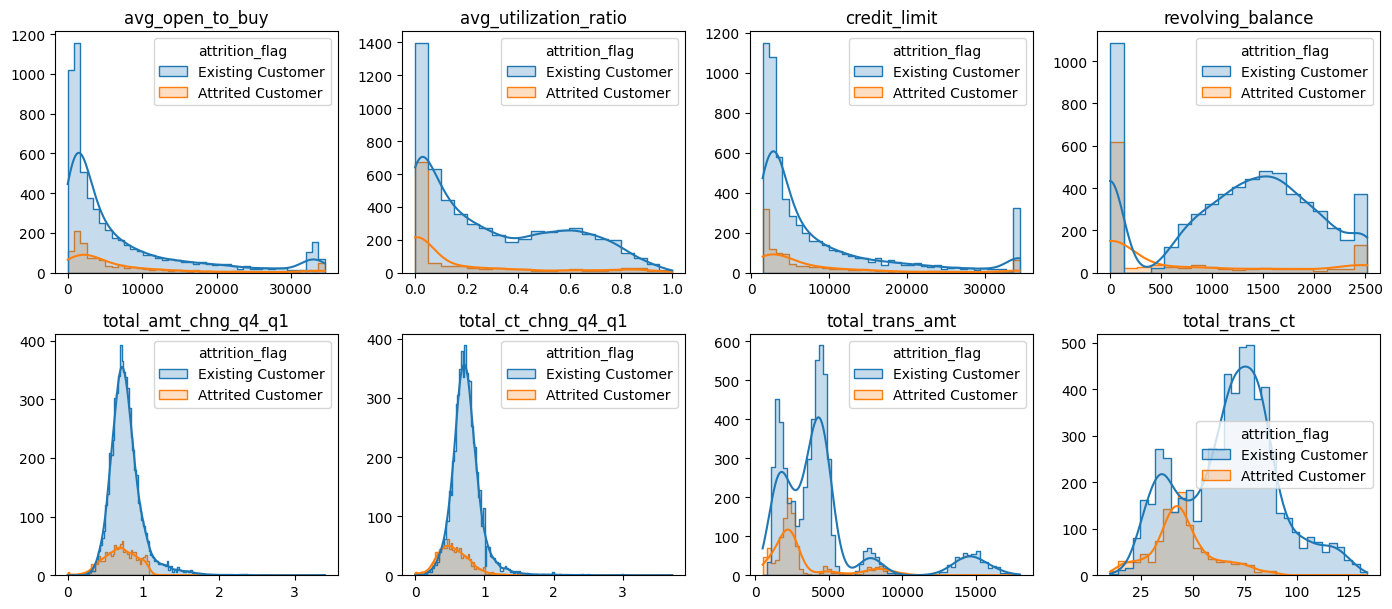

In [36]:
def create_histplot_grid(dataframe, numeric_variables, y):
    """
    Create a grid of histograms for numerical columns with respect to y column.

    Parameters:
    dataframe (pandas.DataFrame): Input dataframe.
    numeric_variables (list): List of numerical column names to plot.
    y (str): Categorical column to plot on the y-axis.

    Returns:
    None
    """
    n_cols = 4  # number of columns in the grid
    n_rows = -(-len(numeric_variables) // n_cols)  # round up division
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 3.1 * n_rows))

    for col, ax in zip(numeric_variables, axes.flatten()):
        sns.histplot(data=dataframe, x=col, hue=y, kde=True, element="step", ax=ax)
        ax.set_title(col)
        ax.set_xlabel("")
        ax.set_ylabel("")

    # remove any unused axes
    for i in range(len(numeric_variables), n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()


create_histplot_grid(df_cleaned, numeric_variables, "attrition_flag")

- The histograms show that a higher number of attrited customers are found on the left sides (mostly) where there’s a higher density.
- We can see that for the 'Revolving_Balance' column, the proportion of attrited customers is higher for the lower values of the balance, indicating that customers with a lower balance are more likely to churn.
- Similarly, for the 'Total_Trans_Ct' column, the proportion of attrited customers is higher for the values between 10 and 75, indicating that customers with a moderate and low number of transactions are more likely to churn. The proportion of attrited customers decreases for high numbers of transactions.

In [37]:
random_state = 42

In [38]:
def split_data(dataframe):
    """
    Split the input dataframe into training and test sets.

    Parameters:
    dataframe (pandas.DataFrame): Input dataframe.

    Returns:
    Tuple of (X_train, X_test, y_train, y_test)
    """
    # Split data into X (features) and y (target variable)
    X = dataframe.drop(columns=["attrition_flag"])
    y = dataframe["attrition_flag"]

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=random_state, stratify=y
    )

    return X_train, X_test, y_train, y_test

In [39]:
X_train, X_test, y_train, y_test = split_data(churn_df)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4956, 19), (2125, 19), (4956,), (2125,))

0    4177
1     779
Name: attrition_flag, dtype: int64
0    1791
1     334
Name: attrition_flag, dtype: int64


<AxesSubplot: >

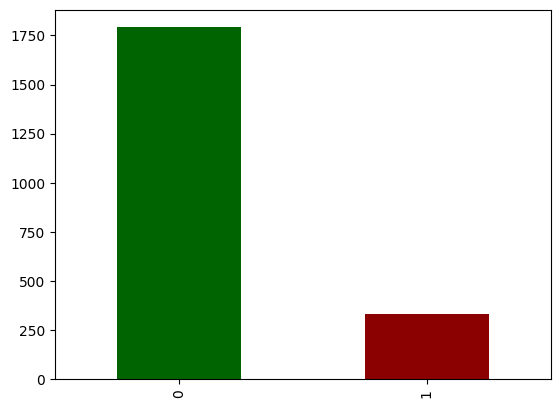

In [40]:
# Visualize the count for each class train
ytr_counts = y_train.value_counts()
print(ytr_counts)

# Visualize the count for each class test
yt_counts = y_test.value_counts()
print(yt_counts)

yt_counts.plot.bar(color=["darkgreen", "darkred"])

In [41]:
def fit_models(X_train, X_test, y_train, y_test, models):
    """
    Fit the data to the specified models and evaluate their performance.

    Parameters:
    X_train (array-like): Training data features.
    X_test (array-like): Test data features.
    y_train (array-like): Training data target variable.
    y_test (array-like): Test data target variable.
    models (dict): Dictionary containing the models to be trained.

    Returns:
    dict: Dictionary containing the evaluation metrics for each model.
    """
    metrics = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        auc = roc_auc_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        metrics[name] = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "auc": auc,
            "confusion_matrix": cm,
        }
    return metrics

- Hyperparameters tuning for the three chosen models
- Choosing 'F1' as a delimiter between the scoring methods as it works better with classification and imbalanced sets overall.

In [42]:
class_weight = {}

# Define the parameter grids for each model
lr_param_grid = {
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": [0.1, 1, 10],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}

svm_param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"],
}

rf_param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Define the models to be trained
models = {
    "Logistic Regression": LogisticRegression(
        random_state=random_state, class_weight=class_weight
    ),
    "Support Vector Machines": SVC(random_state=random_state, class_weight=class_weight),
    "Random Forest": RandomForestClassifier(random_state=random_state, class_weight=class_weight),
}


scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average="weighted"),
    "recall": make_scorer(recall_score, average="weighted"),
    "f1": make_scorer(f1_score, average="weighted"),
}

# Define the parameter grids for each model
param_grids = {
    "Logistic Regression": lr_param_grid,
    "Support Vector Machines": svm_param_grid,
    "Random Forest": rf_param_grid,
}


# Perform grid search for each model
best_params = {}
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(
        model, param_grid, cv=5, n_jobs=-1, scoring=scoring, refit="f1"
    )
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_

# Print the best hyperparameters for each model
for model_name, params in best_params.items():
    print(f"Best hyperparameters for {model_name}: {params}")

Best hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}
Best hyperparameters for Support Vector Machines: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


- Creating *models_best_params* dictionary to hold the best params info and to be used later for the imbalaced techniques.

In [43]:
# Use the best hyperparameters to initialize the models
models_best_params = {}
for model_name, params in best_params.items():
    if model_name == "Logistic Regression":
        models_best_params[model_name] = LogisticRegression(
            random_state=random_state, class_weight=class_weight, **params
        )
    elif model_name == "Support Vector Machines":
        models_best_params[model_name] = SVC(
            random_state=random_state, class_weight=class_weight, **params
        )
    elif model_name == "Random Forest":
        models_best_params[model_name] = RandomForestClassifier(
            random_state=random_state, class_weight=class_weight, **params
        )

# Fit the data to the models and evaluate their performance
metrics = fit_models(X_train, X_test, y_train, y_test, models_best_params)

# Convert the metrics dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(metrics, orient="index")

In [44]:
results_df

,accuracy,precision,recall,f1,auc,confusion_matrix
Logistic Regression,0.904000,0.753906,0.577844,0.654237,0.771334,"[[1728, 63], [141, 193]]"
Support Vector Machines,0.923294,0.802120,0.679641,0.735818,0.824187,"[[1735, 56], [107, 227]]"
Random Forest,0.953412,0.918149,0.772455,0.839024,0.879807,"[[1768, 23], [76, 258]]"


## Feature importance

In [45]:
X = churn_df.drop(columns=["attrition_flag"])
y = churn_df["attrition_flag"]
    
# Compute feature importance for each model in the models_best_params dictionary
for model_name, model in models_best_params.items():
    if model_name == "Logistic Regression":
        # Extract coefficients from the logistic regression model
        lr_coefs = model.coef_[0]
        lr_feature_importance = np.abs(lr_coefs)
        # Sort features by importance and print the top 5
        lr_top_5 = X.columns[np.argsort(lr_feature_importance)[::-1]][:5]
        print('Logistic Regression top 5 features:', lr_top_5.tolist())

    elif model_name == "Support Vector Machines":
        # Compute feature importance using permutation importance
        svm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=random_state)
        svm_feature_importance = svm_importance.importances_mean
        # Sort features by importance and print the top 5
        svm_top_5 = X.columns[np.argsort(svm_feature_importance)[::-1]][:5]
        print('SVM top 5 features:', svm_top_5.tolist())

    elif model_name == "Random Forest":
        # Extract feature importances from the random forest model
        rf_feature_importance = model.feature_importances_
        # Sort features by importance and print the top 5
        rf_top_5 = X.columns[np.argsort(rf_feature_importance)[::-1]][:5]
        print('Random Forest top 5 features:', rf_top_5.tolist())

Logistic Regression top 5 features: ['total_trans_ct', 'total_ct_chng_q4_q1', 'total_trans_amt', 'months_inactive_12', 'revolving_balance']
SVM top 5 features: ['total_trans_ct', 'total_trans_amt', 'total_relationship_count', 'revolving_balance', 'total_ct_chng_q4_q1']
Random Forest top 5 features: ['total_trans_ct', 'total_trans_amt', 'revolving_balance', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']


* For customer attrition prediction in banking, recall and precision are both important metrics to consider, as they can have different impacts on business outcomes.

* High recall is desirable because it means that the model is able to correctly identify as many at-risk customers (true positives) as possible, thereby reducing the number of customers who leave the bank without warning. This can help the bank take proactive measures to retain customers, such as offering them better incentives or improving their customer service experience. 
* On the other hand, high precision is also important to ensure that the bank doesn't waste resources trying to retain customers who are not actually at risk of leaving (false positives).

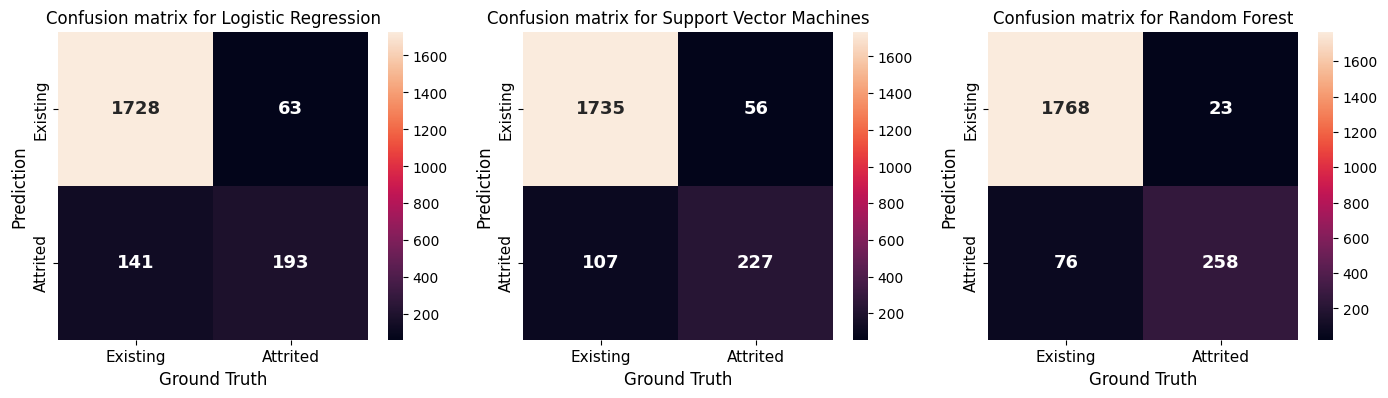

In [46]:
def print_confusion_matrix(metrics):
    """
    Print the confusion matrix for each model.

    Parameters:
    metrics (dict): Dictionary containing the evaluation metrics for each model.

    Returns:
    None
    """
    fig, axs = plt.subplots(1, 3, figsize=(17, 4))

    for i, (name, metric) in enumerate(metrics.items()):
        sns.set_palette(sns.color_palette())
        ax = sns.heatmap(
            metric["confusion_matrix"],
            annot=True,
            fmt="d",
            annot_kws={"size": 13, "weight": "bold"},
            ax=axs[i],
        )
        ax.set_title(f"Confusion matrix for {name}")
        labels = ["Existing", "Attrited"]
        ax.set_xticklabels(labels, fontsize=11)
        ax.set_yticklabels(labels, fontsize=11)
        ax.set_ylabel("Prediction", fontsize=12)
        ax.set_xlabel("Ground Truth", fontsize=12)

    plt.show()


print_confusion_matrix(metrics)

## Considering the dataset is imbalaced, we will try to improve the precision and recall with resampling or class weighting methods.

### Synthetic Minority Oversampling Technique (SMOTE)

,accuracy,precision,recall,f1,auc,confusion_matrix
Logistic Regression,0.851294,0.517308,0.805389,0.629977,0.832622,"[[1540, 251], [65, 269]]"
Support Vector Machines,0.901647,0.642369,0.844311,0.729625,0.878325,"[[1634, 157], [52, 282]]"
Random Forest,0.952941,0.858896,0.838323,0.848485,0.906320,"[[1745, 46], [54, 280]]"


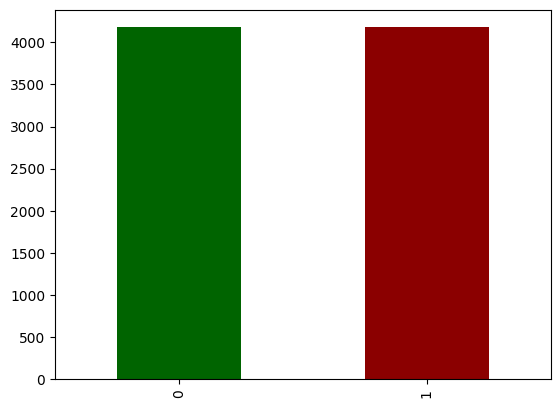

In [47]:
# Create a SMOTE sampler
smote_sampler = SMOTE(random_state=random_state)

# Resample training data using SMOTE
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)

# Visualize classes
y_smo.value_counts().plot.bar(color=["darkgreen", "darkred"])

# Train models
metrics_smo = fit_models(X_smo, X_test, y_smo, y_test, models_best_params)

# Convert the metrics dictionary to a pandas DataFrame
results_df_smo = pd.DataFrame.from_dict(metrics_smo, orient="index")
results_df_smo.columns = [
    "accuracy",
    "precision",
    "recall",
    "f1",
    "auc",
    "confusion_matrix",
]
results_df_smo

### Class reweighting

In [48]:
# Add weights to the classes
class_weight[0] = 0.15
class_weight[1] = 0.85
print(class_weight)

# Train models
metrics_cw = fit_models(X_train, X_test, y_train, y_test, models_best_params)

# Convert the metrics dictionary to a pandas DataFrame
results_df_cw = pd.DataFrame.from_dict(metrics_cw, orient="index")
results_df_cw.columns = [
    "accuracy",
    "precision",
    "recall",
    "f1",
    "auc",
    "confusion_matrix",
]
results_df_cw

{0: 0.15, 1: 0.85}


,accuracy,precision,recall,f1,auc,confusion_matrix
Logistic Regression,0.831529,0.478947,0.817365,0.603982,0.825768,"[[1494, 297], [61, 273]]"
Support Vector Machines,0.872471,0.562624,0.847305,0.676225,0.862234,"[[1571, 220], [51, 283]]"
Random Forest,0.952000,0.900000,0.781437,0.836538,0.882623,"[[1762, 29], [73, 261]]"


### Random Undersampling

,accuracy,precision,recall,f1,auc,confusion_matrix
Logistic Regression,0.658824,0.309268,0.949102,0.466519,0.776896,"[[1083, 708], [17, 317]]"
Support Vector Machines,0.688471,0.331276,0.964072,0.493109,0.800573,"[[1141, 650], [12, 322]]"
Random Forest,0.922824,0.685590,0.940120,0.792929,0.929859,"[[1647, 144], [20, 314]]"


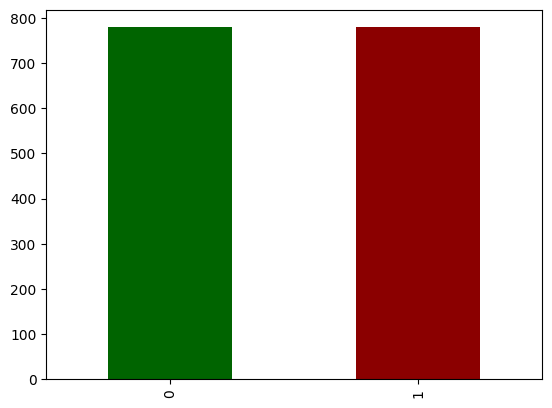

In [49]:
# Create an Undersampling sampler
under_sampler = RandomUnderSampler(random_state=random_state)

# Resample training data using undersampling
X_us, y_us = under_sampler.fit_resample(X_train, y_train)

# Visualize classes
y_us.value_counts().plot.bar(color=["darkgreen", "darkred"])

# Train models
metrics_us = fit_models(X_us, X_test, y_us, y_test, models_best_params)

# Convert the metrics dictionary to a pandas DataFrame
results_df_us = pd.DataFrame.from_dict(metrics_us, orient="index")
results_df_us.columns = [
    "accuracy",
    "precision",
    "recall",
    "f1",
    "auc",
    "confusion_matrix",
]
results_df_us

## Comparing results

In [50]:
# Combine the four DataFrames into one
combined_df = pd.concat(
    [results_df, results_df_smo, results_df_cw, results_df_us],
    keys=["Original", "SMOTE", "ClassWeight", "UnderSampling"],
)

# Show the combined DataFrame
combined_df

accuracy  precision    recall  \
Original      Logistic Regression      0.904000   0.753906  0.577844   
              Support Vector Machines  0.923294   0.802120  0.679641   
              Random Forest            0.953412   0.918149  0.772455   
SMOTE         Logistic Regression      0.851294   0.517308  0.805389   
              Support Vector Machines  0.901647   0.642369  0.844311   
              Random Forest            0.952941   0.858896  0.838323   
ClassWeight   Logistic Regression      0.831529   0.478947  0.817365   
              Support Vector Machines  0.872471   0.562624  0.847305   
              Random Forest            0.952000   0.900000  0.781437   
UnderSampling Logistic Regression      0.658824   0.309268  0.949102   
              Support Vector Machines  0.688471   0.331276  0.964072   
              Random Forest            0.922824   0.685590  0.940120   

                                             f1       auc  \
Original      Logistic Regression      0.654237  0.771334   
              Support Vector Machines  0.735818  0.824187   
              Random Forest            0.839024  0.879807   
SMOTE         Logistic Regression      0.629977  0.832622   
              Support Vector Machines  0.729625  0.878325   
              Random Forest            0.848485  0.906320   
ClassWeight   Logistic Regression      0.603982  0.825768   
              Support Vector Machines  0.676225  0.862234   
              Random Forest            0.836538  0.882623   
UnderSampling Logistic Regression      0.466519  0.776896   
              Support Vector Machines  0.493109  0.800573   
              Random Forest            0.792929  0.929859   

                                               confusion_matrix  
Original      Logistic Regression      [[1728, 63], [141, 193]]  
              Support Vector Machines  [[1735, 56], [107, 227]]  
              Random Forest             [[1768, 23], [76, 258]]  
SMOTE         Logistic Regression      [[1540, 251], [65, 269]]  
              Support Vector Machines  [[1634, 157], [52, 282]]  
              Random Forest             [[1745, 46], [54, 280]]  
ClassWeight   Logistic Regression      [[1494, 297], [61, 273]]  
              Support Vector Machines  [[1571, 220], [51, 283]]  
              Random Forest             [[1762, 29], [73, 261]]  
UnderSampling Logistic Regression      [[1083, 708], [17, 317]]  
              Support Vector Machines  [[1141, 650], [12, 322]]  
              Random Forest            [[1647, 144], [20, 314]]

##### Model conclusion:
* Random Forest looks to perform the best across all models.
* The most balanced scores for precision and recall are by using the Random Forest with SMOTE technique, which keeps both metrics close to 85%.

- With the Random Forest model using SMOTE, which has a balanced precision and recall score of around 85%, we can accurately identify the customers who are at high risk of churning. This can be incredibly valuable for the bank because as they can develop targeted retention strategies for these customers. In addition, the model can help the bank save resources by allowing them to focus their retention efforts on the customers who are most likely to churn. This can be much more efficient than trying to retain all customers, which can be a resource-intensive process.

##### Possible other steps:
- Imputation or collection of additional data. One limitation of the current analysis is the missing values which cut back on ~30% of the dataset.
- Consider re-visiting the analysis after obtaining additional data or engineering more features, and see if the performance of the model improves.
- Transforming the data to a normal distribution can improve the performance of the model. This is especially true for some parametric models, such as logistic regression.
- Refining the modeling approach. Other models could be explored or grid search could be utilized with different hyperparameters to fine-tune the model and potentially improve its performance.

In [51]:
# Record the end time
end_time = time.time()

# Compute the total time it took to run the notebook
total_time = end_time - start_time

print(f"Total time to run the notebook: {total_time:.2f} seconds")

Total time to run the notebook: 146.15 seconds
